In [5]:
import os
print(os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

df = pd.read_csv('6.csv')
df.head()


/home/jovyan


,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,18.0,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$50.0,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,28.0,Male,High,Married,High School,High,Huocheng,Food & Beverages,$102.55,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,35.0,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$182.95,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,38.0,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$261.1,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,43.0,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$404.86,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            999 non-null    object 
 1   Age                                    999 non-null    float64
 2   Gender                                 999 non-null    object 
 3   Income_Level                           999 non-null    object 
 4   Marital_Status                         999 non-null    object 
 5   Education_Level                        999 non-null    object 
 6   Occupation                             999 non-null    object 
 7   Location                               999 non-null    object 
 8   Purchase_Category                      999 non-null    object 
 9   Purchase_Amount                        999 non-null    object 
 10  Frequency_of_Purchase                  999 non-null    int64  
 11  Purcha

In [3]:
df.describe(include='all')



,Purchase_Category,Age,Gender_Dummy,Purchase_Amount,Social,Ads,Device_Shopping
count,999,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
unique,24,NaN,NaN,NaN,NaN,NaN,NaN
top,Electronics,NaN,NaN,NaN,NaN,NaN,NaN
freq,54,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,78.477477,0.506507,511.092943,2.734735,2.746747,0.956957
std,NaN,34.654713,0.500208,170.544620,0.752221,0.716906,0.807746
min,NaN,15.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,NaN,48.000000,0.000000,519.995000,3.000000,3.000000,0.000000
50%,NaN,80.000000,1.000000,600.000000,3.000000,3.000000,1.000000
75%,NaN,106.500000,1.000000,600.000000,3.000000,3.000000,2.000000


###### df["Gender"] == "Male":
Esto genera una serie booleana donde cada valor será:

True si el valor de la columna Gender es "Male",

False en cualquier otro caso.

In [7]:
df["Gender_Dummy"] = (df["Gender"] == "Male").astype(int)
df[["Gender", "Gender_Dummy"]].head()

,Gender,Gender_Dummy
0,Female,0
1,Male,1
2,Female,0
3,Female,0
4,Female,0


In [8]:
from sklearn.preprocessing import LabelEncoder

df["Ads"] = LabelEncoder().fit_transform(df["Engagement_with_Ads"])

ads_mapping_df = df[["Engagement_with_Ads", "Ads"]].drop_duplicates().sort_values("Ads")

ads_mapping_df.reset_index(drop=True, inplace=True)
ads_mapping_df

,Engagement_with_Ads,Ads
0,High,0
1,Low,1
2,Medium,2
3,NaN,3


In [9]:
social_order = {"None": 0, "Low": 1, "Medium": 2, "High": 3}
df["Social"] = df["Social_Media_Influence"].map(social_order)

In [10]:

df["Device_Shopping"] = LabelEncoder().fit_transform(df["Device_Used_for_Shopping"])


device_mapping_df = df[["Device_Used_for_Shopping", "Device_Shopping"]].drop_duplicates().sort_values("Device_Shopping")
device_mapping_df.reset_index(drop=True, inplace=True)
print(device_mapping_df)
device_mapping_df = df[["Device_Used_for_Shopping", "Device_Shopping"]].drop_duplicates().sort_values("Device_Shopping")

device_mapping_df.reset_index(drop=True)

  Device_Used_for_Shopping  Device_Shopping
0                  Desktop                0
1               Smartphone                1
2                   Tablet                2


,Device_Used_for_Shopping,Device_Shopping
0,Desktop,0
1,Smartphone,1
2,Tablet,2


In [11]:
# Verificar si quedan valores nulos en todo el DataFrame
missing_values_final = df.isnull().sum()

# Filtrar solo las columnas que aún tienen valores nulos (si las hay)
missing_values_final = missing_values_final[missing_values_final > 0]

missing_values_final

Social_Media_Influence    56
Engagement_with_Ads       47
dtype: int64

In [11]:
df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\$,]', '', regex=True).astype(float)
df["Purchase_Amount"].head()

0     50.00
1    102.55
2    182.95
3    261.10
4    404.86
Name: Purchase_Amount, dtype: float64

In [13]:
df["Purchase_Amount"].isna().sum()

np.int64(0)

In [13]:
df[df["Purchase_Amount"] <= 0]

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Gender_Dummy,Ads,Social,Device_Shopping


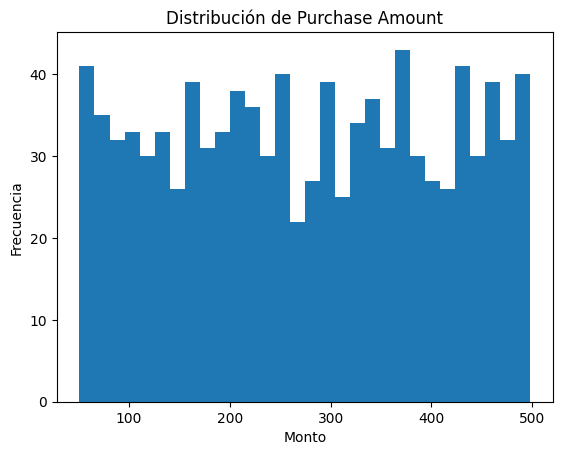

In [16]:

plt.hist(df["Purchase_Amount"], bins=30)
plt.title("Distribución de Purchase Amount")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.show()

In [26]:
variables = [
    "Frequency_of_Purchase",
    "Purchase_Category",
    "Age",
    "Gender",
    "Purchase_Amount",
    "Social_Media_Influence",
    "Engagement_with_Ads",
    "Device_Used_for_Shopping"
]

df_model = df[variables].copy()

In [27]:
df_model.isnull().sum()

Frequency_of_Purchase         0
Purchase_Category             0
Age                           0
Gender                        0
Purchase_Amount               0
Social_Media_Influence      250
Engagement_with_Ads         250
Device_Used_for_Shopping      0
dtype: int64

 #### Las columnas Social_Media_Influence y Engagement_with_Ads ya no tienen valores faltantes —los completé usando su valor más frecuente (moda).

In [12]:
for col in ["Social_Media_Influence", "Engagement_with_Ads"]:
    df[col].fillna(df[col].mode()[0], inplace=True)
df[["Social_Media_Influence", "Engagement_with_Ads"]].isnull().sum()

/tmp/ipykernel_2144/3265019190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Social_Media_Influence    0
Engagement_with_Ads       0
dtype: int64

In [32]:
df_model = pd.get_dummies(df_model, columns=[
    "Frequency_of_Purchase",
    "Purchase_Category",
    "Social_Media_Influence",
    "Engagement_with_Ads"
], drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   float64
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

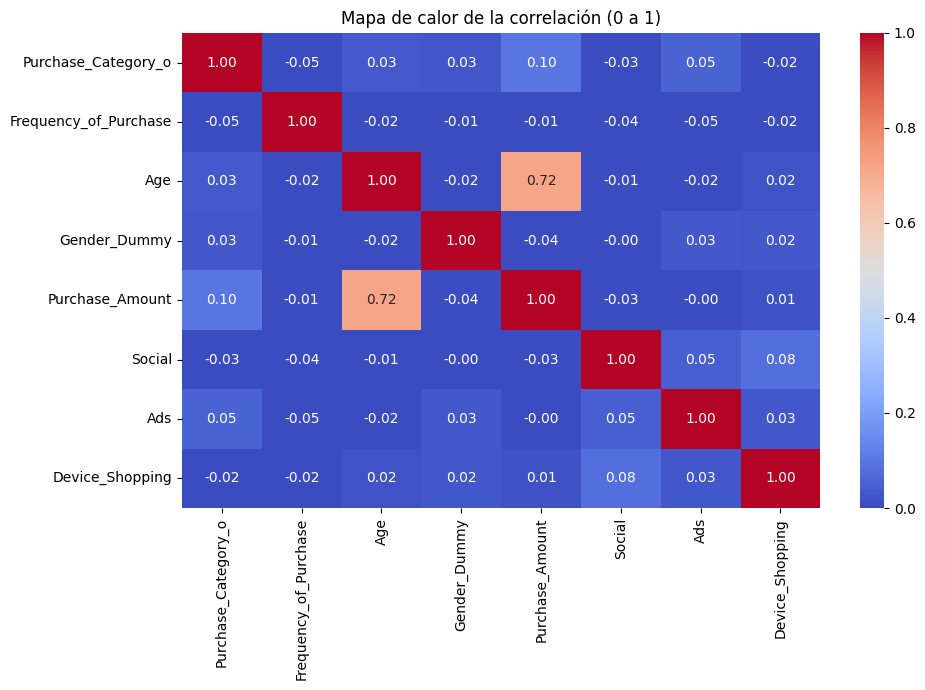

In [17]:
from sklearn.preprocessing import LabelEncoder



# Codificar la variable objetivo original 'Purchase_Category'
df["Purchase_Category_o"] = LabelEncoder().fit_transform(df["Purchase_Category"])

# Seleccionar las variables ya modificadas para el análisis
vars_for_cov = [
    "Purchase_Category_o",
    "Frequency_of_Purchase",
    "Age",
    "Gender_Dummy",
    "Purchase_Amount",
    "Social",
    "Ads",
    "Device_Shopping"
]

corr_matrix = df[vars_for_cov].corr()

# Mostrar mapa de calor entre 0 y 1
plt.figure(figsize=(10, 7))
snb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=0, vmax=1)
plt.title("Mapa de calor de la correlación (0 a 1)")
plt.tight_layout()
plt.show()


In [18]:

# Mostrar todas las categorías únicas
unique_categories = df["Purchase_Category"].unique()

# Sugerencia de agrupación en macrogrupos para tendencias de mercado
macrogroup_map = {
    "Tech": [
        "Electronics", "Computers & Tablets", "Software & Apps", "Mobile Accessories"
    ],
    "Home": [
        "Home Appliances", "Furniture", "Kitchen & Dining",
        "Pet Supplies", "Gardening & Outdoor", "Baby Products",
        "Stationery & Office"
    ],
    "Style": [
        "Jewelry & Accessories", "Clothing", "Beauty & Personal Care",
        "Footwear", "Watches"
    ],
    "Entertainment": [
        "Toys & Games", "Sports & Outdoors", "Books", "Musical Instruments"
    ]
}

# Verificar qué categorías no están cubiertas
all_grouped = sum(macrogroup_map.values(), [])
other_categories = [cat for cat in unique_categories if cat not in all_grouped]

# Crear DataFrame resumen
grouped_summary = []
for group, cats in macrogroup_map.items():
    for cat in cats:
        grouped_summary.append({"Macrogrupo": group, "Categoría": cat})

for cat in other_categories:
    grouped_summary.append({"Macrogrupo": "Other", "Categoría": cat})

grouped_df = pd.DataFrame(grouped_summary)
print(grouped_df.head())         # Ver las primeras filas



  Macrogrupo            Categoría
0       Tech          Electronics
1       Tech  Computers & Tablets
2       Tech      Software & Apps
3       Tech   Mobile Accessories
4       Home      Home Appliances


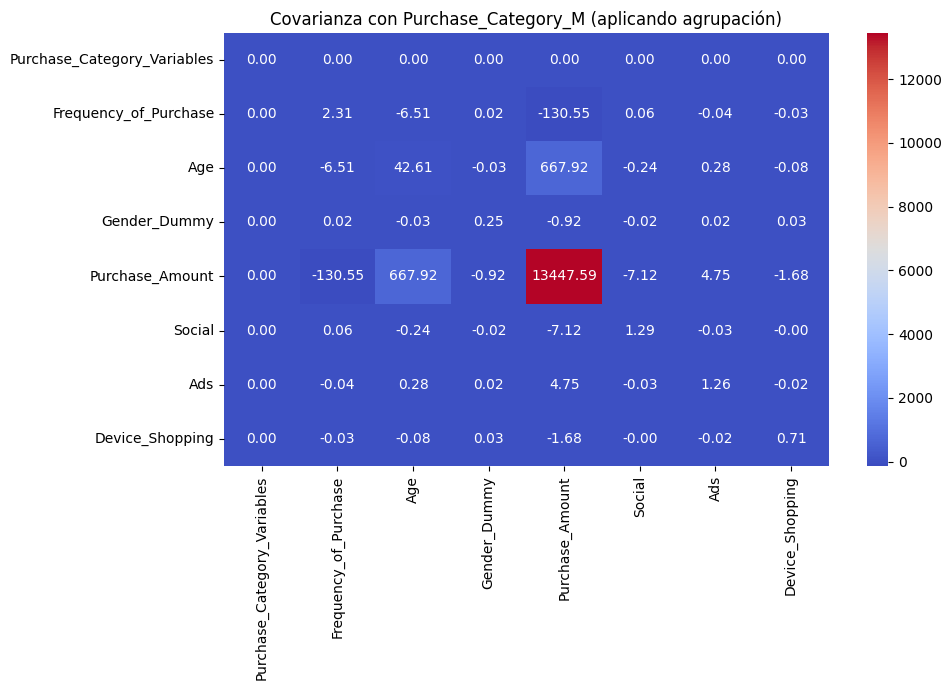

In [16]:
from sklearn.preprocessing import LabelEncoder



df["Purchase_Category_M"] = df["Purchase_Category"].apply(
    lambda x: next((group for group, cats in macrogroup_map.items() if x in cats), "Other")
)

# Codificar los macrogrupos como valores numéricos
df["Purchase_Category_Variables"] = LabelEncoder().fit_transform(df["Purchase_Category_M"])

# Variables a usar para la covarianza
vars_macro_cov = [
    "Purchase_Category_Variables",
    "Frequency_of_Purchase",
    "Age",
    "Gender_Dummy",
    "Purchase_Amount",
    "Social",
    "Ads",
    "Device_Shopping"
]

# Calcular matriz de covarianza
cov_matrix_macro_final = df[vars_macro_cov].cov()

# Mostrar el mapa de calor de covarianza
plt.figure(figsize=(10, 7))
snb.heatmap(cov_matrix_macro_final, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covarianza con Purchase_Category_M (aplicando agrupación)")
plt.tight_layout()
plt.show()